<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 2. Flux
## Simple tank
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

This notebook compiles recharge and discharge data from the Blautopf catchment in the Swabian Alb.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

----
## Tank geometry

<img style="height: 250px;" src="images/tank.jpg">

We define a **tank** with height $\Delta h=h_1-h_2$ [m] and cross section $A_{catch}$ [m$^2$],
which will be filled with a recharge rate $Q_{in}$ [m$^3$/s].


Along the right side, the tank is drained via a small outlet pipe with cross section $A_{pipe}$ [m$^2$],
thus water leaves the tank with an outflow rate $Q_{out}$ [m$^3$/s].

In a first step, we will fill the tank using a **precipitation rate** $N(=v_{in})$ [mm/yr], 
accululated over a **time period** $\Delta t$.

----
## Reading data
Read precipitation data from Merklingen station.

In [3]:
Merklingen_N = np.loadtxt('data/Merklingen2020_recharge_N.x')
N_times = []
for i in range(Merklingen_N.shape[0]):
    yyyy = str(Merklingen_N[i,0])[0:4]
    mm   = str(Merklingen_N[i,0])[4:6]
    dd   = str(Merklingen_N[i,0])[6:8]
    hh   = str(Merklingen_N[i,0])[8:10]
    N_times.append(datetime.datetime(int(yyyy),int(mm),int(dd),int(hh),0))

In [4]:
print('Annual precipitation N[mm/yr]: ',Merklingen_N[:,1].sum())

Annual precipitation N[mm/yr]:  664.7


----
## Filling the tank (no outflow)

We define the **precipitation rate** $v_{in}$ [mm/d], and a **catchment area** $A_{catch}$ [m$^2$].

Multiplying precipitation rate and catchment area gives the flow into the tank, $Q_{in}$ [m$^3$/s]:
$$
Q_{in} = v_{in} A_{catch}
$$

The change in volume $V$ [m$^3$] of the tank is given  by:
$$
\frac{dV}{dt} = Q_{in} - Q_{out}
$$
with $t$ [s] time and $Q_{out}$ [m$^3$/s] the outflow rate.

The volume itself for a cylindrical tank is catchment area $A_{catch}$ times **fill height** $h$ [m]:
$$
V = A_{catch} h
$$

Combining these three equations and neglecting outflow ($Q_{out}=0$), we obtain a 
differential equation of first orer for the fill height:
$$\fbox{$
\frac{dh}{dt} = v_{in}
$}$$
Integration the differential equation, we obtain fill height as a function of time:
$$
h(t) = \int_{0}^{t} v_{in} dt
$$


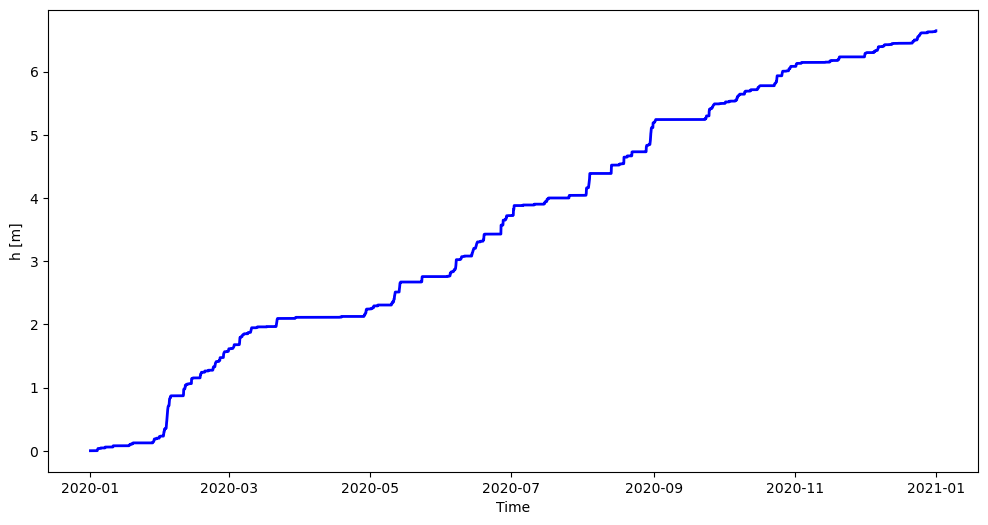

In [5]:
Qin = [0]
dt  = 1. # hour
for i in range(1,Merklingen_N.shape[0]):
    Qin.append(Qin[i-1]+Merklingen_N[i,1]/100*dt)
    
plt.figure(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('h [m]')
plt.plot(N_times,Qin,linewidth=2,color='blue',label='$Q_{in}$')

----
## Draining the tank (no inflow)

Next, we drain the tank with a given outflow rate $Q_{out}$ [m$^3$/s] through a pipe at the bottom
of the tank, which has a diameter $A_{pipe}$ [m$^2$].

The volume change in the tank is then given as ($Q_{in}=0$):
$$
\frac{dV}{dt} = - Q_{out} = - v_{out} A_{pipe}
$$

As before, the volume of the tank is given as
$$
V = A_{catch} h
$$

Then, combining the two equations, the change in water height is given as:
$$\fbox{$
\frac{dh}{dt} = - \frac{A_{pipe}}{A_{catch}} v_{out}
$}$$

To estimate $v_{out}$, we need to look at the **energy balance** for the tank, which leads us to the ...

[Bernoulli equation ->](Dynamics_lab02_bernoulli.ipynb)

... done